In [160]:
import numpy as np
import pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score, roc_auc_score, auc
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("white")

# Import data

In [53]:
df_train = pd.read_csv("df_train_c.csv")
df_test = pd.read_csv("df_test_c.csv")

In [46]:
df_train.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'Weekend',
       'Month.Aug', 'Month.Dec', 'Month.Feb', 'Month.Jul', 'Month.June',
       'Month.Mar', 'Month.May', 'Month.Nov', 'Month.Oct', 'Month.Sep',
       'VisitorType.New_Visitor', 'VisitorType.Other',
       'VisitorType.Returning_Visitor'],
      dtype='object')

In [54]:
y_train = df_train.pop("Revenue")
y_test = df_test.pop("Revenue")

In [34]:
mms = MinMaxScaler()

In [55]:
X_train = df_train
X_test = df_test
#X_train = mms.fit_transform(df_train)
#X_test = mms.fit_transform(df_test)

In [49]:
#X_train

# 1 layer

In [190]:
fnn_1 = MLPClassifier(hidden_layer_sizes=(5), random_state=1).fit(X_train, y_train)
y_pred_1 = fnn_1.predict(X_test)
y_pred_prob_1 = fnn_1.predict_proba(X_test)

In [191]:
mat_fnn1 = confusion_matrix(y_pred_1, y_test)
mat_fnn1

array([[4576,  281],
       [ 654,  654]])

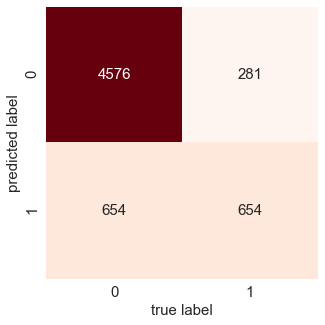

In [192]:
plt.figure(figsize=(5,5))
sns.heatmap(mat_fnn1, cmap="Reds", square=True, annot=True, fmt="d", cbar=False, xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel("true label")
plt.ylabel("predicted label")
plt.rc("font", size=15)
plt.show()
plt.close()

In [193]:
print("Test error: %1.2f" %(y_pred_1 != y_test).mean())
print("Sensitivity: %1.2f" %(sum((y_pred_1==1)&(y_test==1))/sum(y_test==1)))
print("Specificity: %1.2f" %(sum((y_pred_1==0)&(y_test==0))/sum(y_test==0)))
print("AUC: %1.2f" %roc_auc_score(y_test, pd.DataFrame(y_pred_prob_1)[1]))

Test error: 0.15
Sensitivity: 0.70
Specificity: 0.87
AUC: 0.87


In [196]:
#print(classification_report(y_test, y_pred_fnn1))

# 2 layers

In [195]:
fnn_2 = MLPClassifier(hidden_layer_sizes=(5, 5), random_state=1).fit(X_train, y_train)
y_pred_2 = fnn_2.predict(X_test)
y_pred_prob_2 = fnn_2.predict_proba(X_test)

In [197]:
print("Test error: %1.2f" %(y_pred_2 != y_test).mean())
print("Sensitivity: %1.2f" %(sum((y_pred_2==1)&(y_test==1))/sum(y_test==1)))
print("Specificity: %1.2f" %(sum((y_pred_2==0)&(y_test==0))/sum(y_test==0)))
print("AUC: %1.2f" %roc_auc_score(y_test, pd.DataFrame(y_pred_prob_2)[1]))

Test error: 0.19
Sensitivity: 0.88
Specificity: 0.79
AUC: 0.91


# 3 layers

In [216]:
fnn_3 = MLPClassifier(hidden_layer_sizes=(5, 5, 5), random_state=5).fit(X_train, y_train)
y_pred_3 = fnn_3.predict(X_test)
y_pred_prob_3 = fnn_3.predict_proba(X_test)

In [217]:
print("Test error: %1.2f" %(y_pred_3 != y_test).mean())
print("Sensitivity: %1.2f" %(sum((y_pred_3==1)&(y_test==1))/sum(y_test==1)))
print("Specificity: %1.2f" %(sum((y_pred_3==0)&(y_test==0))/sum(y_test==0)))
print("AUC: %1.2f" %roc_auc_score(y_test, pd.DataFrame(y_pred_prob_3)[1]))

Test error: 0.12
Sensitivity: 0.73
Specificity: 0.91
AUC: 0.90


# 4 layers

In [210]:
fnn_4 = MLPClassifier(hidden_layer_sizes=(5, 5, 5, 5), random_state=1).fit(X_train, y_train)
y_pred_4 = fnn_4.predict(X_test)
y_pred_prob_4 = fnn_3.predict_proba(X_test)

In [211]:
print("Test error: %1.2f" %(y_pred_4 != y_test).mean())
print("Sensitivity: %1.2f" %(sum((y_pred_4==1)&(y_test==1))/sum(y_test==1)))
print("Specificity: %1.2f" %(sum((y_pred_4==0)&(y_test==0))/sum(y_test==0)))
print("AUC: %1.2f" %roc_auc_score(y_test, pd.DataFrame(y_pred_prob_4)[1]))

Test error: 0.11
Sensitivity: 0.58
Specificity: 0.95
AUC: 0.91
